In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt

# Append base directory to path
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
path1p = os.path.dirname(currentdir)
libpath = os.path.join(path1p, "lib")
sys.path.insert(0, libpath) 
print("Appended library directory", libpath)

# Import libraries
from classify_lib import linear_classifiability, linear_classifiability_eqpart

Appended library directory /media/aleksejs/DataHDD/work/codes/theoretical-models/experimental-bridge/TNU2019-Project/src/lib


## Test Basic Classifiability

In [4]:
data1 = np.random.normal(1, 1, 1000)
data2 = np.random.normal(3, 1, 1000)

data = np.expand_dims(np.hstack((data1, data2)), axis=1)
labels = np.hstack((np.zeros(1000), np.ones(1000)))

lclass = linear_classifiability(data, labels, Nperm=1000, print_freq=100)

0
100
200
300
400
500
600
700
800
900


Z-score of true labeling is 40.95032984391613


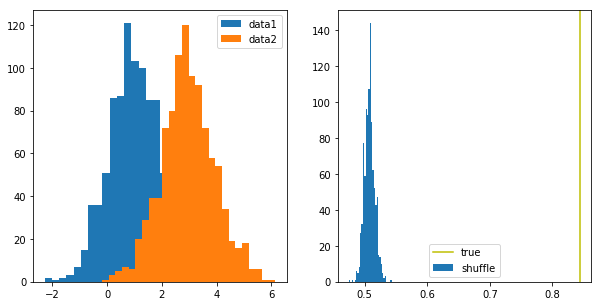

In [5]:
z = (lclass['acc_true']-np.nanmean(lclass['acc_shuffle'])) / np.nanstd(lclass['acc_shuffle'])
print("Z-score of true labeling is", z) 

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].hist(data1, bins='auto', label='data1')
ax[0].hist(data2, bins='auto', label='data2')
ax[0].legend()
ax[1].axvline(x=lclass['acc_true'], ymin=0, ymax=1, label='true', color='y')
ax[1].hist(lclass['acc_shuffle'],bins='auto', label='shuffle')
ax[1].legend()
plt.show()

## Test Equi-sized classifiability

In [6]:
NDATA1 = 1000
NDATA2 = 20
data1 = np.random.normal(1, 1, NDATA1)
data2 = np.random.normal(3, 1, NDATA2)

data = np.expand_dims(np.hstack((data1, data2)), axis=1)
labels = np.hstack((np.zeros(NDATA1), np.ones(NDATA2)))

lclassEQ = linear_classifiability_eqpart(data, labels, Nperm=10000, print_freq=1000)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


2-sample Z-score is 3.194594369833665


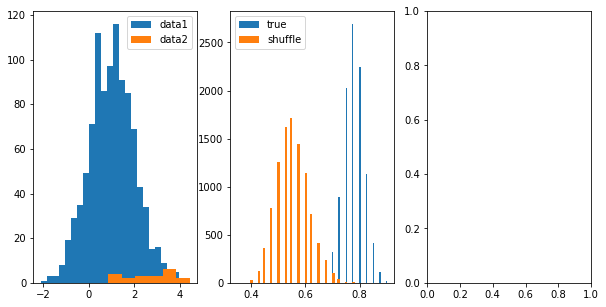

In [9]:
zscore_2sample = lambda x, y: (np.nanmean(x) - np.nanmean(y))/np.sqrt(np.nanvar(x) + np.nanvar(y))
print("2-sample Z-score is", zscore_2sample(lclassEQ['acc_true'], lclassEQ['acc_shuffle']))

fig, ax = plt.subplots(ncols=3, figsize=(10,5))
ax[0].hist(data1, bins='auto', label='data1')
ax[0].hist(data2, bins='auto', label='data2')
ax[0].legend()
ax[1].hist(lclassEQ['acc_true'],bins='auto', label='true')
ax[1].hist(lclassEQ['acc_shuffle'],bins='auto', label='shuffle')
ax[1].legend()
plt.show()